In [1]:
import pandas as pd

file_path = "D:/Data STATBIS ITS/TUGAS AKHIR/preprocessing data/preprocessed_568670.csv"

# Membaca file CSV ke dalam DataFrame
data_frame = pd.read_csv(file_path)

# Menghitung jumlah baris data
jumlah_baris = data_frame.shape[0]

# Menampilkan jumlah baris dan jumlah kapal
print("Jumlah baris data:", jumlah_baris)

jumlah_kapal = data_frame['msg_mmsi'].nunique()
print("Jumlah kapal:", jumlah_kapal)

Jumlah baris data: 568670
Jumlah kapal: 1403


In [2]:
print("Daftar kolom:")
print(data_frame.columns)

Daftar kolom:
Index(['msg_mmsi', 'msg_kind', 'msg_repeat', 'data_lat', 'data_lon',
       'data_nav', 'data_rot', 'data_sog', 'data_cog', 'data_head', 'data_utc',
       'dt_last', 'ship_name', 'ship_csign', 'shipkind_id', 'shipflag_id',
       'ship_gt', 'ship_dwt', 'ship_lbp', 'ship_loa', 'ship_draft',
       'ship_depth', 'ship_beam', 'ship_build_int', 'ship_build_str',
       'ship_class', 'shipkind_name', 'flag_name\', 'dt_date time1',
       'dt_date time2', 'dt_date.time1', 'continuous_trip', 'distance',
       'time_diff_seconds', 'empirical_speed'],
      dtype='object')


In [3]:
# Menampilkan summary data
print("Summary data:")
print(data_frame.describe())

Summary data:
           msg_mmsi       msg_kind  msg_repeat       data_lat       data_lon  \
count  5.686700e+05  568670.000000    568670.0  568670.000000  568670.000000   
mean   5.171715e+08       4.289154         0.0      -5.904608     106.053657   
std    5.240261e+07       6.038226         0.0       0.133165       0.243528   
min    1.234568e+08       1.000000         0.0      -7.045150     104.631100   
25%    5.250071e+08       1.000000         0.0      -5.962510     105.963630   
50%    5.250194e+08       1.000000         0.0      -5.935000     105.995680   
75%    5.251060e+08       3.000000         0.0      -5.882320     106.112250   
max    8.100160e+08      19.000000         0.0      -5.087190     107.459870   

            data_nav       data_rot       data_sog       data_cog  \
count  568670.000000  568670.000000  568670.000000  568670.000000   
mean        2.160974     -63.076718       2.041381     182.020836   
std         3.873036      65.531469       3.879322     107

In [4]:
import pandas as pd

# Memisahkan data antar kapal berdasarkan 'msg_mmsi'
kapal_data = []
for mmsi, group_data in data_frame.groupby('msg_mmsi'):
    kapal_data.append(group_data)

# Menghitung lintasan selanjutnya untuk setiap kapal
for kapal in kapal_data:
    kapal['Data_lat_next'] = kapal['data_lat'].shift(-1)
    kapal['Data_lon_next'] = kapal['data_lon'].shift(-1)

# Menghapus baris terakhir yang tidak memiliki lintasan selanjutnya untuk setiap kapal
kapal_cleaned_data = []
for kapal in kapal_data:
    kapal_cleaned = kapal.dropna(subset=['Data_lat_next', 'Data_lon_next'])
    kapal_cleaned_data.append(kapal_cleaned)

# Menggabungkan semua DataFrames dalam list kapal_cleaned_data
data_frame_gabung = pd.concat(kapal_cleaned_data, ignore_index=True)

# Menghitung jumlah baris data
jumlah_baris = data_frame_gabung.shape[0]

# Menampilkan jumlah baris dan jumlah kapal
print("Jumlah baris data:", jumlah_baris)

jumlah_kapal = data_frame_gabung['msg_mmsi'].nunique()
print("Jumlah kapal:", jumlah_kapal)

# data_frame_gabung berisi semua data kapal yang telah diubah dan dibersihkan
print(data_frame_gabung.head())

Jumlah baris data: 567267
Jumlah kapal: 1403
    msg_mmsi  msg_kind  msg_repeat  data_lat   data_lon  data_nav  data_rot  \
0  123456780        18           0  -5.93026  106.11832         0       0.0   
1  123456780        18           0  -5.92991  106.11807         0       0.0   
2  123456780        18           0  -5.92918  106.11695         0       0.0   
3  123456780        18           0  -5.92944  106.11706         0       0.0   
4  123456780        18           0  -5.92838  106.11842         0       0.0   

   data_sog  data_cog  data_head  ...  flag_name\         dt_date time1  \
0       2.0        18        511  ...       NULL\   05/13/2021 03:59 PM   
1       1.0       327        511  ...       NULL\   05/13/2021 04:03 PM   
2       0.5        13        511  ...       NULL\   05/13/2021 04:07 PM   
3       1.0       152        511  ...       NULL\   05/13/2021 04:10 PM   
4       1.0        31        511  ...       NULL\   05/13/2021 04:16 PM   

         dt_date time2       

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, GRU, Dense
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.callbacks import EarlyStopping

# Memilih fitur input dan output yang relevan
# Mengubah kolom tanggal-waktu menjadi datetime
data_frame_gabung['dt_date.time1'] = pd.to_datetime(data_frame_gabung['dt_date.time1'])

# Membuat fitur baru
data_frame_gabung['hour'] = data_frame_gabung['dt_date.time1'].dt.hour
data_frame_gabung['day'] = data_frame_gabung['dt_date.time1'].dt.day
data_frame_gabung['month'] = data_frame_gabung['dt_date.time1'].dt.month
data_frame_gabung['year'] = data_frame_gabung['dt_date.time1'].dt.year

# Memilih fitur input dan output
input_features = ['msg_mmsi','data_lat', 'data_lon', 'data_nav','data_rot', 'data_sog', 'data_cog', 'data_head', 'hour', 'day', 'month', 'year']
output_features = ['Data_lat_next', 'Data_lon_next'] 

# Memisahkan fitur input dan output
X = data_frame_gabung[input_features].values
y = data_frame_gabung[output_features].values

# Membagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalasi fitur input (dalam rentang 0-1)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Menentukan dimensi timestep
timestep = X_train_scaled.shape[1]

# Membangun model Bi-GRU
model = Sequential()
model.add(Bidirectional(GRU(units=24, return_sequences=True), input_shape=(timestep, 1)))
model.add(Bidirectional(GRU(units=24)))
model.add(Dense(units=12, activation='relu'))
model.add(Dense(units=len(output_features)))

# Mengompilasi model
model.compile(optimizer='adam', loss=MeanSquaredError())

# Early stopping untuk menghentikan pelatihan jika tidak ada peningkatan yang signifikan dalam validasi loss
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

# Melatih model dengan penyesuaian parameter
history = model.fit(X_train_scaled, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

# Evaluasi model
mse = model.evaluate(X_test_scaled, y_test)
mse = round(mse, 8)
print("MSE:", mse)

# Prediksi menggunakan model
y_pred = model.predict(X_test_scaled)

# Menghitung MAE (Mean Absolute Error)
mae = mean_absolute_error(y_test, y_pred)
mae = round(mae, 8)
print("MAE:", mae)

# Menghitung MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
mape = round(mape, 8)
print("MAPE:", mape)

# Menghitung R-squared
r2 = r2_score(y_test, y_pred)
r2 = round(r2, 8)
print("R-squared:", r2)

Epoch 1/20
5673/5673 [==============================] - 61s 10ms/step - loss: 221.5597 - val_loss: 0.0383
Epoch 2/20
5673/5673 [==============================] - 54s 9ms/step - loss: 0.0357 - val_loss: 0.0241
Epoch 3/20
5673/5673 [==============================] - 55s 10ms/step - loss: 0.0100 - val_loss: 0.0047
Epoch 4/20
5673/5673 [==============================] - 60s 11ms/step - loss: 0.0019 - val_loss: 0.0013
Epoch 5/20
5673/5673 [==============================] - 62s 11ms/step - loss: 6.9107e-04 - val_loss: 4.5336e-04
Epoch 6/20
5673/5673 [==============================] - 65s 11ms/step - loss: 5.7757e-04 - val_loss: 3.7316e-04
Epoch 7/20
5673/5673 [==============================] - 61s 11ms/step - loss: 5.2863e-04 - val_loss: 3.3107e-04
Epoch 8/20
5673/5673 [==============================] - 59s 10ms/step - loss: 4.9443e-04 - val_loss: 3.5821e-04
Epoch 9/20
5673/5673 [==============================] - 62s 11ms/step - loss: 4.7740e-04 - val_loss: 3.4021e-04
Epoch 10/20
3546/3546 [

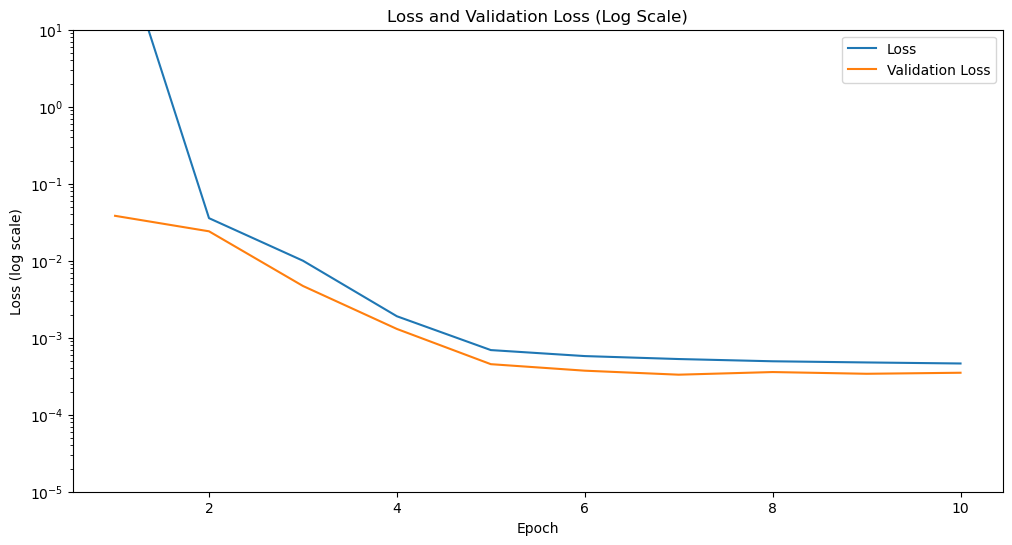

In [1]:
import matplotlib.pyplot as plt

# Data loss dan validation loss
loss = [221.5597, 0.0357, 0.0100, 0.0019, 6.9107e-04, 5.7757e-04, 5.2863e-04, 4.9443e-04, 4.7740e-04, 4.6279e-04]
val_loss = [0.0383, 0.0241, 0.0047, 0.0013, 4.5336e-04, 3.7316e-04, 3.3107e-04, 3.5821e-04, 3.4021e-04, 3.5087e-04]
epochs = range(1, len(loss) + 1)

# Plot loss dan val loss dengan skala logaritmik pada sumbu Y
plt.figure(figsize=(12, 6))
plt.semilogy(epochs, loss, label='Loss')
plt.semilogy(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (log scale)')
plt.legend()
plt.title('Loss and Validation Loss (Log Scale)')

# Menyesuaikan batasan sumbu Y
plt.ylim([1e-5, 1e1])

# Menyimpan visualisasi ke dalam file gambar HD
output_file_path = "loss_valloss.png"
plt.savefig(output_file_path, dpi=300, bbox_inches='tight')

plt.show()

In [7]:
# Menyimpan model ke dalam file HDF5
model.save("model_bigru568670.h5")

# Opsional: Menyimpan skalar MinMax untuk penggunaan di masa depan
import joblib

joblib.dump(scaler, "scaler.pkl")

C:\Users\LENOVO\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


['scaler.pkl']